# The metrics for measuring a split


## Gini Impurity


In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
pos_fraction = np.linspace(0.00, 1.00, 1000)
pos_fraction[0:10]

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901])

In [49]:
# Calculate the Gini impurity for each value of pos_fraction.
# Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled.
# The correct formula is 1 - (fraction of positive class)^2 - (fraction of negative class)^2
gini = 1 - pos_fraction**2 - (1-pos_fraction)**2

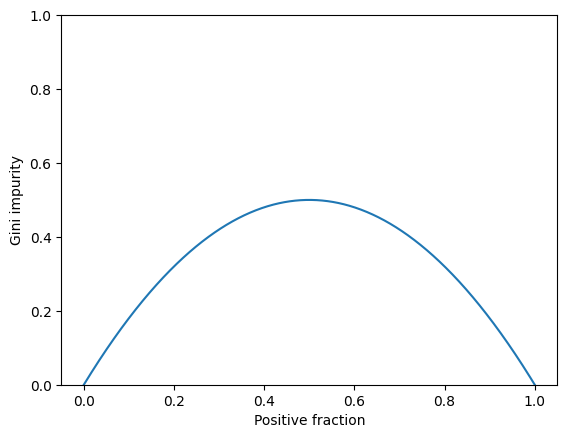

In [50]:
plt.plot(pos_fraction, gini)
plt.ylim(0,1)
plt.xlabel('Positive fraction')
plt.ylabel('Gini impurity')
plt.show()

The fraction of the positive class varies from 0 to 1:

The Gini Impurity is calculated accordingly, followed by the plot of Gini Impurity versus positive
fraction. Here, 1-pos_fraction is the negative fraction:

Refer to Figure 3.5 for the end result:

## gini impurity function


In [51]:
def gini_impurity(labels):
  # When the set is empty, it is also pure.
  if len(labels) == 0:
    return 0

  # Count the occurrences of each label.
  counts = np.unique(labels, return_counts=True)[1]
  print("counts:", counts)

  # Calculate the fraction of each label.
  fractions = counts / len(labels)
  print("fractions:", fractions)

  # Calculate the Gini impurity using the formula: 1 - sum(fraction_of_each_label^2).
  gini = 1 - np.sum(np.power(fractions, 2))
  return gini

In [52]:
print(f'{gini_impurity([1, 1, 0, 1, 0]):.4f}')

counts: [2 3]
fractions: [0.4 0.6]
0.4800


In [53]:
print(f'{gini_impurity([1, 1, 0, 1, 0, 0]):.4f}')

counts: [3 3]
fractions: [0.5 0.5]
0.5000


In [54]:
print(f'{gini_impurity([1, 1, 1, 1]):.4f}')

counts: [4]
fractions: [1.]
0.0000


### **Calculating Gini Impurity for the Given Example**

We have two possible splits:
1. **Split by Gender (Male/Female)**
2. **Split by Interest in Tech (True/False)**

We'll calculate Gini Impurity for both splits to see which one is better.

---

### **1. Split by Gender (Male vs. Female)**
#### **Group 1 (Male)**
| Interested in Tech | Click (Label) |
|--------------------|--------------|
| True               | 1 (Click)    |
| False              | 0 (No Click) |
| False              | 1 (Click)    |

- Total samples = **3**
- **Click (1)**: 2 samples  
- **No Click (0)**: 1 sample  
- Gini Impurity for Group 1 (Male):  
  \[
  G_1 = 1 - \left( \left(\frac{2}{3}\right)^2 + \left(\frac{1}{3}\right)^2 \right) = 1 - \left( \frac{4}{9} + \frac{1}{9} \right) = 1 - \frac{5}{9} = \frac{4}{9} \approx 0.44
  \]

#### **Group 2 (Female)**
| Interested in Tech | Click (Label) |
|--------------------|--------------|
| False              | 0 (No Click) |
| True               | 1 (Click)    |

- Total samples = **2**
- **Click (1)**: 1 sample  
- **No Click (0)**: 1 sample  
- Gini Impurity for Group 2 (Female):  
  \[
  G_2 = 1 - \left( \left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2 \right) = 1 - \left( \frac{1}{4} + \frac{1}{4} \right) = 1 - \frac{2}{4} = 0.5
  \]

#### **Weighted Gini for Gender Split**
\[
G_{\text{gender}} = \left( \frac{3}{5} \times 0.44 \right) + \left( \frac{2}{5} \times 0.5 \right) = 0.264 + 0.2 = 0.464
\]

---

### **2. Split by Interest in Tech (True vs. False)**
#### **Group 1 (Interested in Tech = True)**
| Gender | Click (Label) |
|--------|--------------|
| M      | 1 (Click)    |
| F      | 1 (Click)    |

- Total samples = **2**
- **Click (1)**: 2 samples  
- **No Click (0)**: 0 samples  
- Gini Impurity for Group 1 (Interested=True):  
  \[
  G_1 = 1 - \left( \left(\frac{2}{2}\right)^2 + \left(\frac{0}{2}\right)^2 \right) = 1 - (1 + 0) = 0
  \]

#### **Group 2 (Interested in Tech = False)**
| Gender | Click (Label) |
|--------|--------------|
| F      | 0 (No Click) |
| M      | 0 (No Click) |
| M      | 1 (Click)    |

- Total samples = **3**
- **Click (1)**: 1 sample  
- **No Click (0)**: 2 samples  
- Gini Impurity for Group 2 (Interested=False):  
  \[
  G_2 = 1 - \left( \left(\frac{1}{3}\right)^2 + \left(\frac{2}{3}\right)^2 \right) = 1 - \left( \frac{1}{9} + \frac{4}{9} \right) = 1 - \frac{5}{9} = \frac{4}{9} \approx 0.44
  \]

#### **Weighted Gini for Interest Split**
\[
G_{\text{interest}} = \left( \frac{2}{5} \times 0 \right) + \left( \frac{3}{5} \times 0.44 \right) = 0 + 0.264 = 0.264
\]

---

### **Comparison of Splits**
| Split Feature       | Weighted Gini Impurity |
|---------------------|------------------------|
| Gender (M/F)        | **0.464**              |
| Interest in Tech    | **0.264**              |

### **Conclusion**
- **Splitting by "Interest in Tech"** gives a lower Gini Impurity (**0.264** vs. **0.464**), so it is the **better split**.
- The decision tree would choose **"Interest in Tech"** as the first split because it creates purer subgroups.

---

### **Key Takeaways**
✅ **Gini Impurity measures how mixed a group is.**  
✅ **Lower Gini = Better split (more pure groups).**  
✅ **Decision trees pick splits that minimize Gini Impurity.**  

In this case, **asking "Is the user interested in tech?"** is more useful than asking about gender for predicting clicks. 🚀

## Information Gain


In [55]:
pos_fraction = np.linspace(0.001, 0.999, 1000)

In [56]:
ent = - (pos_fraction * np.log2(pos_fraction) +(1 - pos_fraction) * np.log2(1 - pos_fraction))

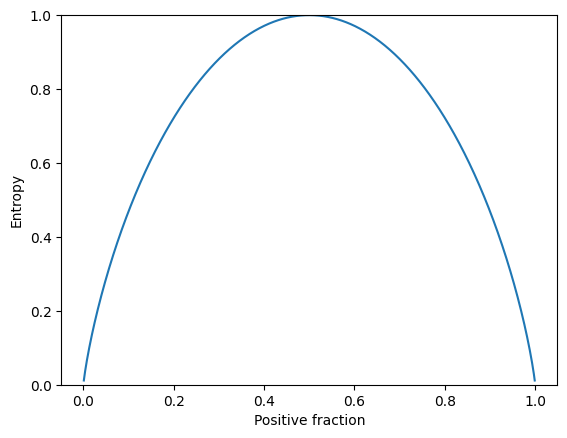

In [57]:
plt.plot(pos_fraction, ent)
plt.xlabel('Positive fraction')
plt.ylabel('Entropy')
plt.ylim(0, 1)
plt.show()

### Information Gain Explained

Imagine you have a big box of mixed-up fruits, and you want to sort them into smaller, more organized boxes. How do you decide which question to ask to create the most organized groups? For example, should you ask "Is the fruit red?" or "Is the fruit round?"

**Information Gain** is a way to measure how much a particular question helps you to organize your data.

#### The Idea (Theoretically)

*   **High Information Gain is Good:** A question that gives you a high information gain is a good question. It means that after asking the question and splitting the fruits based on the answer, the groups you create are much more organized (or "purer") than the original mixed-up box.
*   **Low Information Gain is Bad:** A question with low information gain doesn't help you much. The groups you create are still pretty mixed up.

So, in a decision tree, at each step, we choose the question (the feature and split point) that gives us the **highest Information Gain**.

#### The Math (Simply)

To calculate Information Gain, we use a concept called **Entropy**.

*   **Entropy:** Think of entropy as a measure of messiness or randomness.
    *   A box with a perfect mix of fruits (e.g., 50% apples, 50% oranges) has **high entropy** (it's very messy).
    *   A box with only one type of fruit (e.g., 100% apples) has **zero entropy** (it's perfectly organized).

The formula for Information Gain is:

**Information Gain = Entropy(before splitting) - Average Entropy(after splitting)**

Let's break that down:

1.  **Entropy(before splitting):** This is the messiness of your original, big box of fruit. We call this the "parent" entropy.
2.  **Average Entropy(after splitting):**
    *   After you ask a question (e.g., "Is it red?"), you get two smaller groups (the "children").
    *   You calculate the entropy (messiness) of *each* of these smaller groups.
    *   You then take a *weighted average* of their entropies. The average is weighted by how many fruits are in each group.

**In a nutshell, Information Gain tells you how much the messiness was reduced by asking a particular question.** A bigger reduction in messiness means a better question.

In [58]:
def entropy(labels):
  if len(labels) == 0:
    return 0
  counts = np.unique(labels, return_counts=True)[1]
  fractions = counts / len(labels)
  return -np.sum(fractions * np.log2(fractions))

In [59]:
print(f'{entropy([1, 1, 0, 1, 0]):.4f}')
print(f'{entropy([1, 1, 0, 1, 0, 0]):.4f}')
print(f'{entropy([1, 1, 1, 1]):.4f}')

0.9710
1.0000
-0.0000


### **Step-by-Step Calculation of Entropy and Information Gain for the Self-Driving Car Ad Example**
- 5 users with features (Gender, Interest in Tech) and label (Click: 1 or 0)

| Gender | Interested in Tech | Click |
|--------|--------------------|-------|
| M      | True               | 1     |
| F      | False              | 0     |
| F      | True               | 1     |
| M      | False              | 0     |
| M      | False              | 1     |

---

### **1. Entropy Before Splitting (\(E_{\text{before}}\))**
**Label distribution**:  
- Click (1): 3 samples  
- No Click (0): 2 samples  
- Total samples: 5  

\[
E_{\text{before}} = -\left[ \left(\frac{3}{5} \log_2 \frac{3}{5}\right) + \left(\frac{2}{5} \log_2 \frac{2}{5}\right) \right]
\]

**Calculate**:  
- \(\log_2 \frac{3}{5} = \log_2 0.6 \approx -0.737\)  
- \(\log_2 \frac{2}{5} = \log_2 0.4 \approx -1.322\)  
- \[
  E_{\text{before}} = -\left[ \left(0.6 \times -0.737\right) + \left(0.4 \times -1.322\right) \right] = -\left[ -0.442 - 0.529 \right] = 0.971
  \]

---

### **2. Split #1: By Gender (Male/Female)**
#### **Group 1 (Male: 3 samples)**  
- Labels: [1, 0, 1] → 2 Click (1), 1 No Click (0)  
- \[
  E_{\text{Male}} = -\left[ \left(\frac{2}{3} \log_2 \frac{2}{3}\right) + \left(\frac{1}{3} \log_2 \frac{1}{3}\right) \right]
  \]
- \(\log_2 \frac{2}{3} \approx -0.585\), \(\log_2 \frac{1}{3} \approx -1.585\)  
- \[
  E_{\text{Male}} = -\left[ (0.667 \times -0.585) + (0.333 \times -1.585) \right] = -\left[ -0.390 - 0.528 \right] = 0.918
  \]

#### **Group 2 (Female: 2 samples)**  
- Labels: [0, 1] → 1 Click (1), 1 No Click (0)  
- \[
  E_{\text{Female}} = -\left[ \left(\frac{1}{2} \log_2 \frac{1}{2}\right) + \left(\frac{1}{2} \log_2 \frac{1}{2}\right) \right] = 1
  \]  
*(Since \(\log_2 0.5 = -1\))*

#### **Weighted Entropy After Split**  
\[
E_{\text{after}}^{\text{(Gender)}} = \left( \frac{3}{5} \times 0.918 \right) + \left( \frac{2}{5} \times 1 \right) = 0.551 + 0.4 = 0.951
\]

#### **Information Gain**  
\[
IG_{\text{Gender}} = E_{\text{before}} - E_{\text{after}}^{\text{(Gender)}} = 0.971 - 0.951 = 0.020
\]

---

### **3. Split #2: By Interest in Tech (True/False)**
#### **Group 1 (Interested=True: 2 samples)**  
- Labels: [1, 1] → 2 Click (1), 0 No Click (0)  
- \[
  E_{\text{True}} = -\left[ \left(1 \log_2 1\right) + \left(0 \log_2 0\right) \right] = 0
  \]  
*(\(\log_2 1 = 0\), and \(0 \log_2 0 = 0\) by convention)*

#### **Group 2 (Interested=False: 3 samples)**  
- Labels: [0, 0, 1] → 1 Click (1), 2 No Click (0)  
- \[
  E_{\text{False}} = -\left[ \left(\frac{1}{3} \log_2 \frac{1}{3}\right) + \left(\frac{2}{3} \log_2 \frac{2}{3}\right) \right]
  \]
- *(Same calculation as \(E_{\text{Male}}\) earlier)*  
- \[
  E_{\text{False}} \approx 0.918
  \]

#### **Weighted Entropy After Split**  
\[
E_{\text{after}}^{\text{(Interest)}} = \left( \frac{2}{5} \times 0 \right) + \left( \frac{3}{5} \times 0.918 \right) = 0 + 0.551 = 0.551
\]

#### **Information Gain**  
\[
IG_{\text{Interest}} = E_{\text{before}} - E_{\text{after}}^{\text{(Interest)}} = 0.971 - 0.551 = 0.420
\]

---

### **4. Comparison of Splits**
| Split Feature       | Information Gain |
|---------------------|------------------|
| Gender              | 0.020            |
| Interest in Tech    | **0.420**        |

**Conclusion**:  
- Splitting by **Interest in Tech** gives 21× higher information gain (0.420 vs. 0.020).  
- This matches the Gini Impurity result earlier (Interest split had lower impurity).  
- **Decision trees will pick "Interest in Tech"** as the root split.

---

### **Key Formulas Cheat Sheet**
1. **Entropy**:  
   \[
   E = -\sum (p_i \log_2 p_i)
   \]
   - \(p_i\) = fraction of class \(i\) in the group.

2. **Information Gain**:  
   \[
   IG = E_{\text{before}} - \sum \left( \frac{\text{Samples in split}}{\text{Total samples}} \times E_{\text{split}} \right)
   \]

3. **Decision Rule**:  
   - **Higher IG** = Better split (reduces uncertainty more).  
   - **Lower entropy** = Purer group.

## entropy function

In [60]:
criterion_function = {'gini': gini_impurity, 'entropy': entropy}
def weighted_impurity(groups, criterion='gini'):
  """
  Calculate weighted impurity of children after a split
  @param groups: list of children, and a child consists a
  list of class labels
  @param criterion: metric to measure the quality of a split,
  'gini' for Gini impurity or 'entropy' for
  information gain
  @return: float, weighted impurity
  """
  total = sum(len(group) for group in groups)
  weighted_sum = 0.0
  for group in groups:
    weighted_sum += len(group) / float(total) * criterion_function[criterion](group)
  return weighted_sum

In [61]:
children_1 = [[1, 0, 1], [0, 1]]
children_2 = [[1, 1], [0, 0, 1]]
print(f"Entropy of #1 split: {weighted_impurity(children_1,'entropy'):.4f}")
print(f"Entropy of #2 split: {weighted_impurity(children_2,'entropy'):.4f}")

Entropy of #1 split: 0.9510
Entropy of #2 split: 0.5510


# Implementing a decision tree from scratch

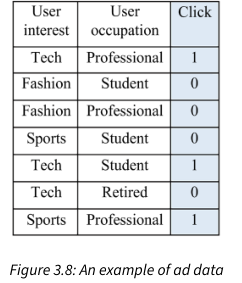

In [62]:
gini_interest_tech = weighted_impurity([[1, 1, 0], [0, 0, 0, 1]])
print(f"Gini impurity for interest in tech: {gini_interest_tech:.4f}")

gini_interest_fashion = weighted_impurity([[0, 0], [1, 0, 1, 0, 1]])
print(f"Gini impurity for interest in fashion: {gini_interest_fashion:.4f}")

gini_interest_sports = weighted_impurity([[0, 1], [1, 0, 0, 1, 0]])
print(f"Gini impurity for interest in sports: {gini_interest_sports:.4f}")

gini_occupation_retired = weighted_impurity([[1, 0, 0, 0, 1, 1], [1]])
print(f"Gini impurity for occupation retired: {gini_occupation_retired:.4f}")

counts: [1 2]
fractions: [0.33333333 0.66666667]
counts: [3 1]
fractions: [0.75 0.25]
Gini impurity for interest in tech: 0.4048
counts: [2]
fractions: [1.]
counts: [2 3]
fractions: [0.4 0.6]
Gini impurity for interest in fashion: 0.3429
counts: [1 1]
fractions: [0.5 0.5]
counts: [3 2]
fractions: [0.6 0.4]
Gini impurity for interest in sports: 0.4857
counts: [3 3]
fractions: [0.5 0.5]
counts: [1]
fractions: [1.]
Gini impurity for occupation retired: 0.4286


In [63]:
impurities = {
    "Interest in Tech": gini_interest_tech,
    "Interest in Fashion": gini_interest_fashion,
    "Interest in Sports": gini_interest_sports,
    "Occupation: Retired": gini_occupation_retired
}

best_split = min(impurities, key=impurities.get)
print(f"The best split is by '{best_split}' with a Gini impurity of {impurities[best_split]:.4f}")

The best split is by 'Interest in Fashion' with a Gini impurity of 0.3429


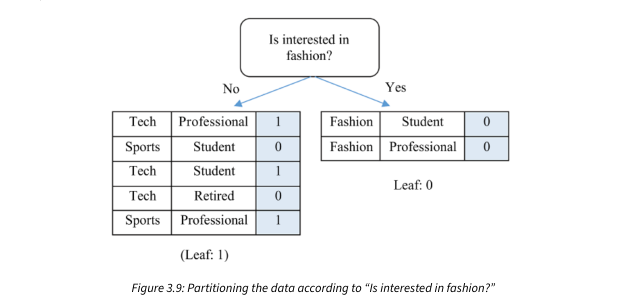

### the splitting process

In [64]:
def split_node(X, y, index, value):
  x_index = X[:, index]
  # if this feature is numerical
  if X[0, index].dtype.kind in ['i', 'f']:
    mask = x_index >= value
  # if this feature is categorical
  else:
    mask = x_index == value
  # split into left and right child
  left = (X[mask], y[mask])
  right = (X[~mask], y[~mask])
  return left, right

In [65]:
def get_best_split(X,y,criterion):
  best_index , best_value, best_score, children = None, None, 1, None
  for index in range(X.shape[1]):
    for value in np.sort(np.unique(X[:,index])):
      groups = split_node(X, y, index, value)
      impurity = weighted_impurity([groups[0][1],groups[1][1],criterion])
      if impurity < best_score:
        best_index, best_value, best_score, children = index, value, impurity, groups
  return {'index': best_index, 'value': best_value,'children': children}

In [66]:
def get_leaf(labels):
    # Create a terminal node value
    return np.bincount(labels).argmax()


- It assigns a leaf node if one of two child nodes is empty

- It assigns a leaf node if the current branch depth exceeds the maximum depth allowed

- It assigns a leaf node if the node does not contain sufficient samples required for a further split

- Otherwise, it proceeds with a further split with the optimal splitting point


In [67]:
def split(node, max_depth, min_size, depth, criterion):
    left, right = node['children']
    del (node['children'])

    # Check for a no-split
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return

    # Check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = get_leaf(left[1]), get_leaf(right[1])
        return

    # Process left child
    if left[1].size <= min_size:
        node['left'] = get_leaf(left[1])
    else:
        result = get_best_split(left[0], left[1], criterion)
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'], max_depth, min_size, depth + 1, criterion)

    # Process right child
    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else:
        result = get_best_split(right[0], right[1], criterion)
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['right'] = get_leaf(result_left[1])
        else:
            node['right'] = result
            split(node['right'], max_depth, min_size, depth + 1, criterion)

In [68]:
def train_tree(X_train, y_train, max_depth, min_size, criterion='gini'):
    X = np.array(X_train)
    y = np.array(y_train)
    root = get_best_split(X, y, criterion)
    split(root, max_depth, min_size, 1, criterion)
    return root

In [69]:
X_train = [['tech', 'professional'],
           ['fashion', 'student'],
           ['fashion', 'professional'],
           ['sports', 'student'],
           ['tech', 'student'],
           ['tech', 'retired'],
           ['sports', 'professional']]
y_train = [1, 0, 0, 0, 1, 0, 1]

tree = train_tree(X_train, y_train, 3, 2)
print(tree)

counts: [2]
fractions: [1.]
counts: [2 3]
fractions: [0.4 0.6]
counts: [1]
fractions: [0.25]
counts: [1 1]
fractions: [0.5 0.5]
counts: [3 2]
fractions: [0.6 0.4]
counts: [1]
fractions: [0.25]
counts: [1 2]
fractions: [0.33333333 0.66666667]
counts: [3 1]
fractions: [0.75 0.25]
counts: [1]
fractions: [0.25]
counts: [1 2]
fractions: [0.33333333 0.66666667]
counts: [3 1]
fractions: [0.75 0.25]
counts: [1]
fractions: [0.25]
counts: [1]
fractions: [1.]
counts: [3 3]
fractions: [0.5 0.5]
counts: [1]
fractions: [0.25]
counts: [2 1]
fractions: [0.66666667 0.33333333]
counts: [2 2]
fractions: [0.5 0.5]
counts: [1]
fractions: [0.25]
counts: [1 1]
fractions: [0.5 0.5]
counts: [1 2]
fractions: [0.33333333 0.66666667]
counts: [1]
fractions: [0.25]
counts: [1 2]
fractions: [0.33333333 0.66666667]
counts: [1 1]
fractions: [0.5 0.5]
counts: [1]
fractions: [0.25]
counts: [2]
fractions: [1.]
counts: [2 1]
fractions: [0.66666667 0.33333333]
counts: [1]
fractions: [0.25]
counts: [1]
fractions: [1.]
count

In [71]:
CONDITION = {'numerical': {'yes': '>=', 'no': '<'},
'categorical': {'yes': 'is', 'no': 'is not'}}
def visualize_tree(node, depth=0):
  if isinstance(node, dict):
    if node['value'].dtype.kind in ['i', 'f']:
      condition = CONDITION['numerical']
    else:
      condition = CONDITION['categorical']
    print('{}|- X{} {} {}'.format(depth * ' ',
    node['index'] + 1, condition['no'], node['value']))
    if 'left' in node:
      visualize_tree(node['left'], depth + 1)
    print('{}|- X{} {} {}'.format(depth * ' ',
    node['index'] + 1, condition['yes'], node['value']))
    if 'right' in node:
      visualize_tree(node['right'], depth + 1)
  else:
    print(f"{depth * ' '}[{node}]")
visualize_tree(tree)

|- X1 is not fashion
 [0]
|- X1 is fashion
 |- X2 is not professional
  [1]
 |- X2 is professional
  |- X1 is not sports
   [0]
  |- X1 is sports
   [0]


In [72]:
!pip install graphviz

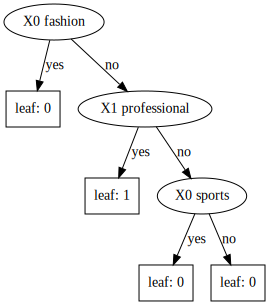

In [74]:
import graphviz

def get_dot_graph(tree):
    dot = graphviz.Digraph()
    id_counter = 0

    def add_nodes_edges(tree, dot, parent_id=None, link_name=None):
        nonlocal id_counter
        node_id = str(id_counter)
        id_counter += 1

        if isinstance(tree, dict):
            name = f"X{tree['index']} {tree['value']}"
            dot.node(node_id, label=name)
            if parent_id is not None:
                dot.edge(parent_id, node_id, label=link_name)
            add_nodes_edges(tree['left'], dot, node_id, 'yes')
            add_nodes_edges(tree['right'], dot, node_id, 'no')
        else:
            name = f"leaf: {tree}"
            dot.node(node_id, label=name, shape='box')
            if parent_id is not None:
                dot.edge(parent_id, node_id, label=link_name)

    add_nodes_edges(tree, dot)
    return dot

dot_graph = get_dot_graph(tree)
dot_graph

In [75]:
X_train_n = [[6, 7],
[2, 4],
[7, 2],
[3, 6],
[4, 7],
[5, 2],
[1, 6],
[2, 0],
[6, 3],
[4, 1]]
y_train_n = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
tree = train_tree(X_train_n, y_train_n, 2, 2)
visualize_tree(tree)

counts: [5 5]
fractions: [0.5 0.5]
counts: [1]
fractions: [0.25]
counts: [5 4]
fractions: [0.55555556 0.44444444]
counts: [1]
fractions: [1.]
counts: [1]
fractions: [0.25]
counts: [4 3]
fractions: [0.57142857 0.42857143]
counts: [1 2]
fractions: [0.33333333 0.66666667]
counts: [1]
fractions: [0.25]
counts: [3 3]
fractions: [0.5 0.5]
counts: [2 2]
fractions: [0.5 0.5]
counts: [1]
fractions: [0.25]
counts: [2 2]
fractions: [0.5 0.5]
counts: [3 3]
fractions: [0.5 0.5]
counts: [1]
fractions: [0.25]
counts: [2 1]
fractions: [0.66666667 0.33333333]
counts: [3 4]
fractions: [0.42857143 0.57142857]
counts: [1]
fractions: [0.25]
counts: [1]
fractions: [1.]
counts: [4 5]
fractions: [0.44444444 0.55555556]
counts: [1]
fractions: [0.25]
counts: [5 5]
fractions: [0.5 0.5]
counts: [1]
fractions: [0.25]
counts: [5 4]
fractions: [0.55555556 0.44444444]
counts: [1]
fractions: [1.]
counts: [1]
fractions: [0.25]
counts: [5 3]
fractions: [0.625 0.375]
counts: [2]
fractions: [1.]
counts: [1]
fractions: [0.

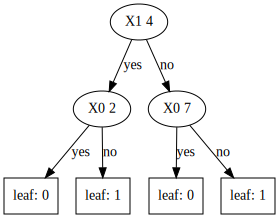

In [76]:
dot_graph = get_dot_graph(tree)
dot_graph

# with scikit-learn

In [77]:
from sklearn.tree import DecisionTreeClassifier
tree_sk = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=2)
tree_sk.fit(X_train_n, y_train_n)

DecisionTreeClassifier(max_depth=2)

In [80]:
from sklearn.tree import export_graphviz
export_graphviz(tree_sk, out_file='tree.dot',
                feature_names=['X1', 'X2'], impurity=False,
                filled=True, class_names=['0', '1'])

In [83]:
!dot -Tpng tree.dot -o tree.png

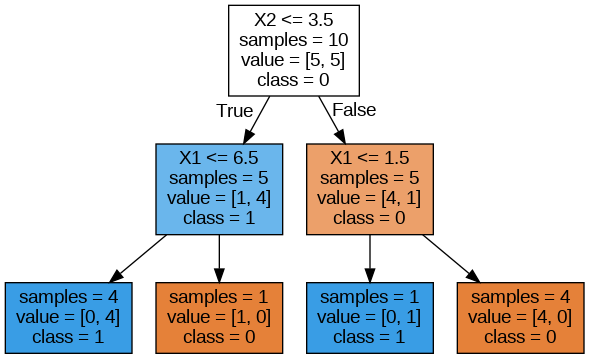

In [84]:
from IPython.display import Image
Image('tree.png')